In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm



In [2]:
path = "/home/u5/Universality_DiHiggs/Data_High_Level_Features/"

herwig_ang_H = pd.read_csv(path + "herwig_ang_H_1.csv")
herwig_ang_QCD = pd.read_csv(path + "herwig_ang_QCD_1.csv")
pythia_def_H = pd.read_csv(path + "pythia_def_H_1.csv")
pythia_def_QCD = pd.read_csv(path + "pythia_def_QCD_1.csv")
pythia_vin_H = pd.read_csv(path + "pythia_vin_H_1.csv")
pythia_vin_QCD = pd.read_csv(path + "pythia_vin_QCD_1.csv")
# pythia_dip = pd.read_csv(path + "pythia_dip_H_1.csv")
# pythia_dip = pd.read_csv(path + "pythia_dip_QCD_1_untrimmed.csv")

features = ["GEN","SHO","PRO",
            "MJJ_0","delta_eta_0",
            "MJ1_0","PTJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0",
            "MJ2_0","PTJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0",
            "MJJ","delta_eta",
            "MJ1","PTJ1","t211","D211","D221","C211","C221",
            "MJ2","PTJ2","t212","D212","D222","C212","C222",
            "eventindex"
           ]

In [3]:
class Samples:
    def __init__(self,herwig_ang_H,pythia_def_H,pythia_vin_H,herwig_ang_QCD,pythia_def_QCD,pythia_vin_QCD):
        self.herwig_ang_H = herwig_ang_H
        self.pythia_def_H = pythia_def_H
        self.pythia_vin_H = pythia_vin_H
        self.herwig_ang_QCD = herwig_ang_QCD
        self.pythia_def_QCD = pythia_def_QCD
        self.pythia_vin_QCD = pythia_vin_QCD
        
    def H_only(self,feature):
        H = [self.herwig_ang_H[feature],self.pythia_def_H[feature],self.pythia_vin_H[feature]]
        return H
    
    def QCD_only(self,feature):
        QCD = [self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature],self.pythia_vin_QCD[feature]]
        return QCD
    
    def H_QCD(self,feature):
        Both = [self.herwig_ang_H[feature],self.pythia_def_H[feature],self.pythia_vin_H[feature],
               self.herwig_ang_QCD[feature],self.pythia_def_QCD[feature],self.pythia_vin_QCD[feature]
              ]
        return Both


In [4]:
TotalSamples = Samples(herwig_ang_H,pythia_def_H,pythia_vin_H,herwig_ang_QCD,pythia_def_QCD,pythia_vin_QCD)

In [5]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)


title = ["Herwig angular (H->hh)","Pythia default (H->hh)","Pythia vincia (H->hh)",#"Pythia dipole (H->hh)",
         "Herwig angular(QCD)", "Pythia default(QCD)", "Pythia vincia(QCD)" #, "Pythia dipole(QCD)"
        ]
colors = ["green","red","blue",#"purple",
          "cyan","black","Orange"#,"lightblue"
         ]


linestyle = ["-","-.",":",#"--",
             "--","o","v"#,":"
            ]




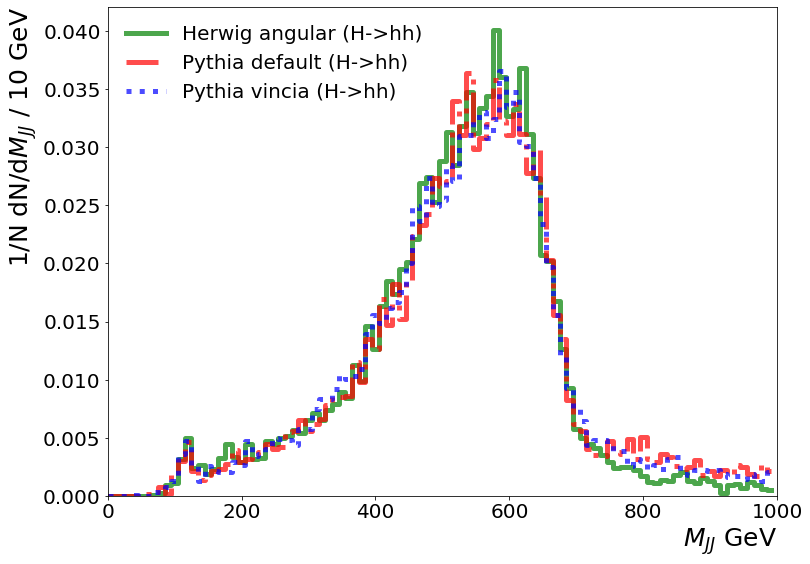

In [6]:
Mjj= TotalSamples.H_only("MJJ")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(Mjj):
    length = np.linspace(0,1000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.xlim((0,1000))
    plt.xlabel("$M_{JJ}$ GeV", fontsize=25,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{JJ}$ / 10 GeV", fontsize=25, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

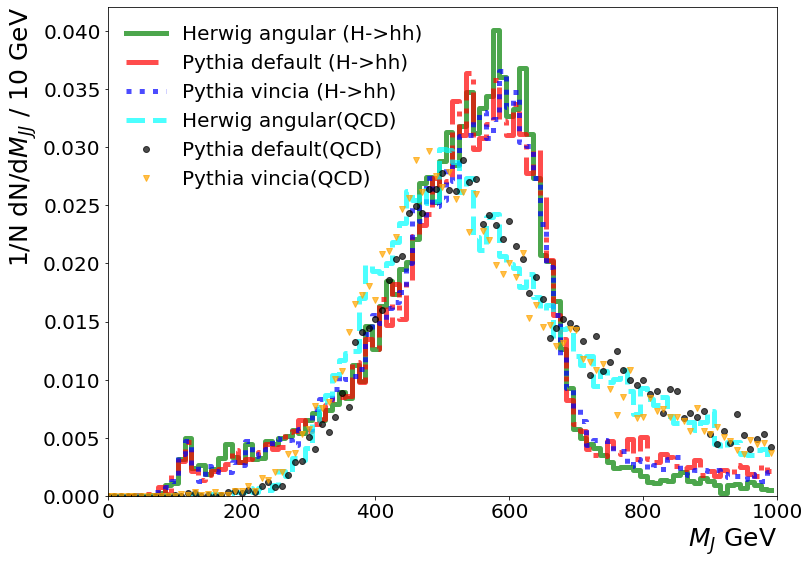

In [46]:
Mjj= TotalSamples.H_QCD("MJJ")

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(Mjj):
    length = np.linspace(0,1000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.xlim((0,1000))
    plt.xlabel("$M_{J}$ GeV", fontsize=25,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{JJ}$ / 10 GeV", fontsize=25, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  